In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp

import cptac
import cptac.utils as u

In [2]:
gbm = cptac.Gbm()
en = cptac.Endometrial()

In [3]:
gene = 'PTEN'
p = gbm.join_omics_to_mutations(
                mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = gene) 
p = gbm.reduce_multiindex(p,levels_to_drop = 3,flatten=True)
p['binary_mutations'] = np.where(
                p[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')
tumors = p[p.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
gbm_p = mut_status.dropna(axis=1,how='all')
gbm_p

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)


Name,PTEN_phosphoproteomics_S121_RSS*HYPAAVQSQAAAER,PTEN_phosphoproteomics_S467_VENGS*LCDQEIDSICSIER,PTEN_phosphoproteomics_S535Y550_TVEEPSNPEASSS*TSVTPDVSDNEPDHY*R,PTEN_phosphoproteomics_S558_YSDTTDS*DPENEPFDEDQHTQITK,PTEN_phosphoproteomics_S558_YSDTTDS*DPENEPFDEDQHTQITKV,PTEN_phosphoproteomics_S558T574_YSDTTDS*DPENEPFDEDQHTQIT*K,PTEN_phosphoproteomics_T556S558_YSDTT*DS*DPENEPFDEDQHTQITK,PTEN_phosphoproteomics_T556S558_YSDTT*DS*DPENEPFDEDQHTQITKV,PTEN_phosphoproteomics_T571_YSDTTDSDPENEPFDEDQHT*QITKV,binary_mutations
Sample_ID,,,,,,,,,,
S001,NaN,-0.383152,NaN,NaN,NaN,NaN,-0.894040,NaN,NaN,Mutated
S002,NaN,-0.856477,NaN,0.184047,0.148851,NaN,0.567752,NaN,NaN,Wildtype
S003,NaN,NaN,NaN,0.695917,NaN,NaN,0.091758,NaN,NaN,Mutated
S004,NaN,0.132950,NaN,-0.603936,NaN,NaN,-0.783059,NaN,NaN,Mutated
S005,NaN,0.190048,NaN,NaN,NaN,NaN,-0.172276,NaN,NaN,Wildtype
...,...,...,...,...,...,...,...,...,...,...
S100,0.249244,-0.573839,NaN,-0.540118,0.136130,NaN,0.058840,NaN,NaN,Mutated
S101,NaN,-0.775464,0.058488,NaN,-0.101288,NaN,-0.661419,NaN,NaN,Wildtype
S102,NaN,0.834857,NaN,1.395325,1.119403,NaN,NaN,NaN,NaN,Wildtype


In [4]:
gbm_col_list = list(gbm_p.columns)
gbm_col_list.remove('binary_mutations')

print("Doing t-test comparisons for GBM\n")
wrap_results = u.wrap_ttest(gbm_p, 'binary_mutations', gbm_col_list, return_all=True)
wrap_results

Doing t-test comparisons for GBM

No significant comparisons.


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,Comparison,P_Value
0,PTEN_phosphoproteomics_S467_VENGS*LCDQEIDSICSIER,0.018662
1,PTEN_phosphoproteomics_S558_YSDTTDS*DPENEPFDED...,0.303694
2,PTEN_phosphoproteomics_S535Y550_TVEEPSNPEASSS*...,0.402431
3,PTEN_phosphoproteomics_T556S558_YSDTT*DS*DPENE...,0.469931
4,PTEN_phosphoproteomics_S558_YSDTTDS*DPENEPFDED...,0.557811
5,PTEN_phosphoproteomics_S121_RSS*HYPAAVQSQAAAER,0.807123
6,PTEN_phosphoproteomics_S558T574_YSDTTDS*DPENEP...,NaN
7,PTEN_phosphoproteomics_T556S558_YSDTT*DS*DPENE...,0.706791
8,PTEN_phosphoproteomics_T571_YSDTTDSDPENEPFDEDQ...,NaN


In [8]:
# Create data frame with all significant phospho sites in order to graph
phospho_list = list(wrap_results['Comparison'])
phospho_df = pd.melt(gbm_p, id_vars = 'binary_mutations', 
            value_vars = phospho_list, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phospho_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names
phospho_df

,binary_mutations,specific_phospho,phosphoproteomics
0,Mutated,PTEN_S467_VENGS*LCDQEIDSICSIER,-0.383152
1,Wildtype,PTEN_S467_VENGS*LCDQEIDSICSIER,-0.856477
2,Mutated,PTEN_S467_VENGS*LCDQEIDSICSIER,NaN
3,Mutated,PTEN_S467_VENGS*LCDQEIDSICSIER,0.132950
4,Wildtype,PTEN_S467_VENGS*LCDQEIDSICSIER,0.190048
...,...,...,...
886,Mutated,PTEN_T571_YSDTTDSDPENEPFDEDQHT*QITKV,NaN
887,Wildtype,PTEN_T571_YSDTTDSDPENEPFDEDQHT*QITKV,NaN
888,Wildtype,PTEN_T571_YSDTTDSDPENEPFDEDQHT*QITKV,NaN
889,Wildtype,PTEN_T571_YSDTTDSDPENEPFDEDQHT*QITKV,NaN


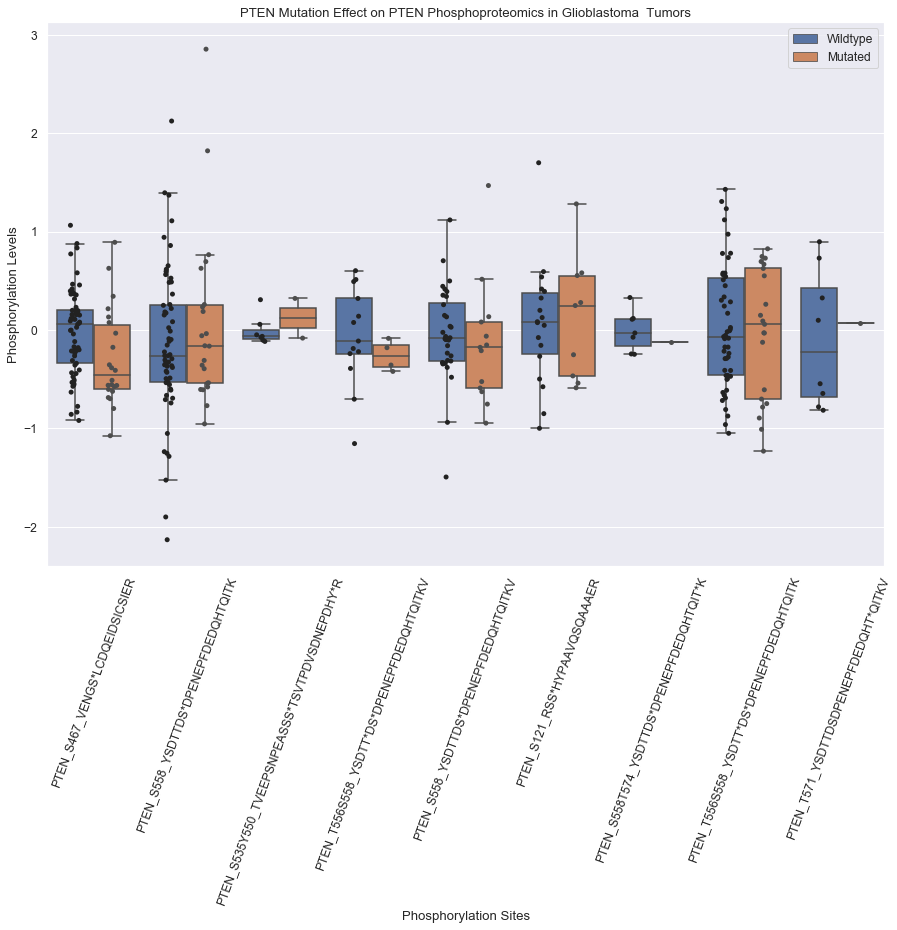

In [20]:
plt.rcParams['figure.figsize']=(15,10) #size of plot
sns.set(font_scale = 1.1)

cis_boxplot = sns.boxplot(data = phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Mutated"], showfliers = False) 
cis_boxplot.set_title(gene + " Mutation Effect on " + gene + " Phosphoproteomics in Glioblastoma  Tumors")
cis_boxplot = sns.stripplot(data = phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Mutated"], jitter = True, color = ".3", dodge = True)
cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels(),rotation=70)

# format legend
handles, labels = cis_boxplot.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2])

plt.show()
plt.clf()
plt.close()


En

In [13]:
p = en.join_omics_to_mutations(
                mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = gene) 
p = en.reduce_multiindex(p,flatten=True)
p['binary_mutations'] = np.where(
                p[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')
tumors = p[p.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
en_p = mut_status.dropna(axis=1,how='all')
en_p

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


Name,PTEN_phosphoproteomics_S467,PTEN_phosphoproteomics_S475,PTEN_phosphoproteomics_S478,PTEN_phosphoproteomics_S537,PTEN_phosphoproteomics_S543,PTEN_phosphoproteomics_S558,PTEN_phosphoproteomics_T539,PTEN_phosphoproteomics_T555,PTEN_phosphoproteomics_T556,binary_mutations
Sample_ID,,,,,,,,,,
S001,0.1950,0.1175,0.175,NaN,NaN,-0.4280,NaN,NaN,NaN,Mutated
S002,-0.0611,-0.0751,NaN,NaN,-0.2560,-0.0996,NaN,NaN,-0.2375,Mutated
S003,0.4160,NaN,NaN,NaN,NaN,-0.8655,NaN,NaN,-0.5510,Mutated
S005,1.7700,NaN,NaN,NaN,NaN,1.0200,NaN,NaN,0.8600,Mutated
S006,0.0258,NaN,NaN,-0.128,-0.0901,-0.2725,-0.0901,NaN,-0.2910,Wildtype
...,...,...,...,...,...,...,...,...,...,...
S099,-1.0400,NaN,NaN,NaN,NaN,-0.1135,NaN,NaN,-0.2270,Mutated
S100,-0.0890,NaN,NaN,0.764,0.7265,1.4000,0.7265,NaN,1.3500,Wildtype
S101,0.1600,NaN,NaN,NaN,0.8980,0.9910,NaN,NaN,0.9910,Wildtype


In [15]:
en_col_list = list(en_p.columns)
en_col_list.remove('binary_mutations')

print("Doing t-test comparisons for Endo\n")
en_wrap_results = u.wrap_ttest(en_p, 'binary_mutations', en_col_list, return_all=True)
en_wrap_results

Doing t-test comparisons for Endo

No significant comparisons.


,Comparison,P_Value
0,PTEN_phosphoproteomics_S543,0.045055
1,PTEN_phosphoproteomics_S475,0.079805
2,PTEN_phosphoproteomics_T539,0.085183
3,PTEN_phosphoproteomics_S478,0.252184
4,PTEN_phosphoproteomics_T556,0.312604
5,PTEN_phosphoproteomics_S558,0.473863
6,PTEN_phosphoproteomics_S467,0.548267
7,PTEN_phosphoproteomics_T555,0.584056
8,PTEN_phosphoproteomics_S537,0.955896


In [17]:
# Create data frame with all significant phospho sites in order to graph
en_phospho_list = list(en_wrap_results['Comparison'])
en_phospho_df = pd.melt(en_p, id_vars = 'binary_mutations', 
            value_vars = en_phospho_list, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
en_phospho_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names
en_phospho_df

,binary_mutations,specific_phospho,phosphoproteomics
0,Mutated,PTEN_S543,NaN
1,Mutated,PTEN_S543,-0.2560
2,Mutated,PTEN_S543,NaN
3,Mutated,PTEN_S543,NaN
4,Wildtype,PTEN_S543,-0.0901
...,...,...,...
850,Mutated,PTEN_S537,NaN
851,Wildtype,PTEN_S537,0.7640
852,Wildtype,PTEN_S537,NaN
853,Wildtype,PTEN_S537,NaN


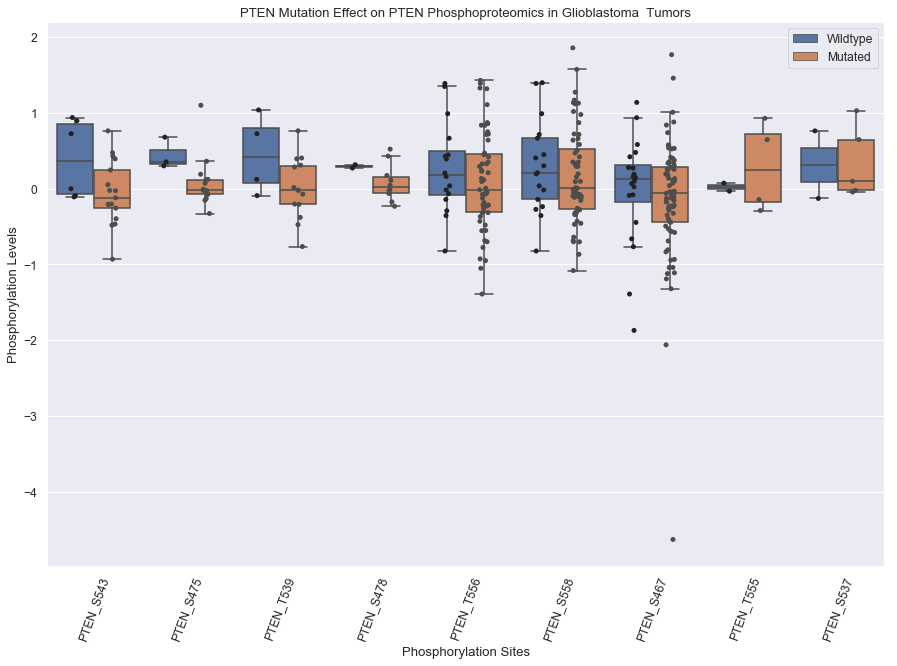

In [18]:
plt.rcParams['figure.figsize']=(15,10) #size of plot
sns.set(font_scale = 1.1)

cis_boxplot = sns.boxplot(data = en_phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Mutated"], showfliers = False) 
cis_boxplot.set_title(gene + " Mutation Effect on " + gene + " Phosphoproteomics in Endometrial  Tumors")
cis_boxplot = sns.stripplot(data = en_phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Mutated"], jitter = True, color = ".3", dodge = True)
cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels(),rotation=70)

# format legend
handles, labels = cis_boxplot.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2])

plt.show()
plt.clf()
plt.close()
